# Trabajo de Inteligencia Artificial

## Análisis de sentimientos

Realizado por:
- Alicia Sánchez Hossdorf
- Rafael Segura Gómez

Fecha: 26/05/2023

Convocatoria de Junio

<h1> 1. Recopilación de datos. </h1>

Importamos un par de bibliotecas que nos haran falta posteriormente, y comprobación de si tenemos ya instaladas las librerias necesarias.

In [1]:
import importlib
if importlib.util.find_spec("selenium") is None:
    !pip install selenium
    print("Installed selenium succesfully")
else:
    print("Selenium is already installed")
    
if importlib.util.find_spec("textblob") is None:
    !pip install textblob
    print("Installed Textblob succesfully")
else:
    print("Textblob is already installed")

Selenium is already installed
Textblob is already installed


In [2]:
import pandas
import numpy
import os
import csv

from textblob import TextBlob

Hemos descargado todos los tweets que necesitamos en un CSV. Por lo que debemos leer los datos del archivo.

In [3]:
tweetsCSV = pandas.read_csv("../Notebook/Tweets/Tweets_entrenamiento.csv", header=0)

Para saber cuantos tweets tenemos, miraremos cuantas filas tiene el archivo.

In [4]:
print(tweetsCSV.shape)

(27480, 4)


In [5]:
# 10 primeras filas
tweetsCSV.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


Como solo necesitamos la columna text, que es donde estan los tweets que necesitamos, haremos una seleccion de dicha columna.


In [6]:
tweets = tweetsCSV[['text']]

In [7]:
tweets.head(20)

,text
0,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t..."
5,http://www.dothebouncy.com/smf - some shameles...
6,2am feedings for the baby are fun when he is a...
7,Soooo high
8,Both of you
9,Journey!? Wow... u just became cooler. hehe....


<h1> 2. Eliminar las palabras que no aportan información </h1>

Importamos las bibliotecas de NLTK y Regex, para filtrar, tokenizar y, en general, tratar el texto para simplificarlo y poder trabajarlo.

In [8]:
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk import download

download('punkt', download_dir='.')

[nltk_data] Downloading package punkt to ....
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
sWords = set(stopwords.words('english'))
print(sWords)

{'same', 'aren', "needn't", 'such', 'does', 'were', 'me', 'but', 'when', 'further', 'if', 'some', 'should', 'his', 'yours', 'we', 'did', 'on', 'all', 'ain', 'after', 'yourselves', 'her', 'myself', "you're", "that'll", 'needn', 'there', 'very', 'than', "won't", 'hasn', 'mustn', 'are', "shan't", 'no', 'i', 'wouldn', 'what', 'ourselves', "didn't", 'them', 'each', 'during', 'few', 'haven', 'in', "aren't", 's', "isn't", 'off', 'is', 'now', 'hers', 'how', 'these', "wasn't", 'as', 'for', 't', 'been', 'then', 'again', 'those', 'it', 'other', 'being', 'too', 'you', 'd', 'or', "doesn't", 'down', 'their', 'itself', 'its', 'between', 'll', 'have', 'doing', 'hadn', 'mightn', 'o', "should've", 'to', 'the', 'only', 'this', 'himself', 'has', 'didn', 'by', 'own', 'at', "you'll", 'themselves', "haven't", 'having', 'will', 'be', 'through', 'so', "you've", 'from', 'above', 'where', 'an', "hadn't", 'he', 're', 'not', 'doesn', 'ours', 'about', 'whom', 'theirs', 'against', 'a', 'yourself', 'over', 'ma', 'our

Crear una función clean_text para eliminar las palabras comunes y poco informativas; eliminar menciones, hashtags, URLs y cualquier otro símbolo extraño; y que utilice técnicas de lematización (stemming) y tokenización para reducir las palabras a su forma base

In [12]:
#Funcion para eliminar las stop words y tokenizado.

def delete_stopWords(tweet):
    tweetLow = tweet.lower()
    tweetWords = word_tokenize(tweetLow)
    tweetFiltered = []
        
    for w in tweetWords:
        if w not in sWords:
            tweetFiltered.append(w)
    return tweetFiltered

In [13]:
#Esta funcion es para eliminar menciones, hashtags, URLs y cualquier otro símbolo extraño mediante regex.

def delete_otherElements(tweet):
    tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
    tweet = re.sub("#[A-Za-z0-9_]+","", tweet)
    tweet = re.sub("http[^\s]+","",tweet)
    tweetFiltered = re.sub(r"[-()\"#/@;:<>{}+=*~|.!?,]", "", tweet)

    return tweetFiltered


## Función para limpiar el text

Con los tweets tokenizados, lematizados y sin stop words lo pasamos a lista.

In [14]:
def clean_text(Tweets): 
    res = Tweets.copy()
    i = 0;
    #Iniciar SnowBall Stemmer con idioma ingles
    stemmer = SnowballStemmer("english")
    while i<len(Tweets):
        tweet_cleaned = []
        
        clean_t = delete_otherElements(Tweets['text'].get(i))
        
        #__Para corregir gramaticalmente descomentar la siguiente linea__
        #clean_t = str(TextBlob(clean_t).correct())
        
        tNoStopWords = delete_stopWords(clean_t)
        #Esto es para la lematización de la frase. 
        for w in tNoStopWords:
            if w != "`":
                tweet_cleaned.append(stemmer.stem(w))
        res.at[i,'text'] = tweet_cleaned
        
        i+=1
    return res

In [15]:
# Limpiamos los tweets aplicandole la función
tweets_cleaned = clean_text(tweets)

In [16]:
print(tweets_cleaned.head(20))

                                                 text
0                                       [respond, go]
1                       [sooo, sad, miss, san, diego]
2                                       [boss, bulli]
3                             [interview, leav, alon]
4                 [son, put, releas, alreadi, bought]
5       [shameless, plug, best, ranger, forum, earth]
6                  [2am, feed, babi, fun, smile, coo]
7                                       [soooo, high]
8                                                  []
9     [journey, wow, u, becam, cooler, hehe, possibl]
10  [much, love, hope, reckon, chanc, minim, p, ne...
11  [realli, realli, like, song, love, stori, tayl...
12                    [sharpi, run, danger, low, ink]
13             [want, go, music, tonight, lost, voic]
14                             [test, test, lg, env2]
15                                  [uh, oh, sunburn]
16               [ok, tri, plot, altern, speak, sigh]
17  [sick, past, day, thus, 

Se implementó una correción gramatical de los tweets pero es inviable en un set de datos de semejante tamaño, lo comentamos para no usarlo ahora, pero lo dejamos por si hiciera falta la funcionalidad.

In [17]:
# Corrige el dataframe y muestra ambas columnas, corregido y original, no modifica variables originales
#tweets_cleaned['text_corregido'] = tweets_cleaned['text'].apply(lambda x: str(TextBlob(" ".join(x)).correct()))


#print(tweets_cleaned.head(20))

In [18]:
# Muestra el dataframe con los textos corregidos
#tweets_cleaned[['text_corregido']]

## Etiquetado de datos

Creamos la funcion para etiquetar texto y ver la polaridad, el sentimiento, entre -1 y 1 de peor a mejor, respectivamente. Escribimos en un archivo _resultado.csv_ los textos con la columna de la polaridad correspondiente, para trabajarla posteriormente.

In [19]:
def tag_text(text):
    tweet = ' '.join(text)  # Convertir la lista de palabras en una cadena de text
    blob = TextBlob(tweet) #Convierte los tweets a tipo Blob para aplicarle la libreria
    tag = blob.sentiment.polarity #Polaridad entre -1 y 1, de peor a mejor respectivamente
    return text, tag

csv_path = 'Tweets/resultados.csv'

#Escritura en un archivo CSV nuevo
with open(csv_path, 'w', newline='',encoding='utf-8-sig') as csv_file: #Forzamos formato utf-8, otro da problemas
    writer = csv.writer(csv_file)
    writer.writerow(['text', 'tag', 'sentiment']) #Crea columna sentiment también
    
    if len(tweets_cleaned) == 0:  #Checkea si está vacío
        print("Nothing to tag, espabila notas.")
        exit()

    for _, row in tweets_cleaned.iterrows(): #Usamos iterrows porque tweets_cleaned es de tipo dataframe
       # if row['text']:  # Verificar si el campo 'text' no está vacío
            result = tag_text(row['text'])
            result = (*result, '')  # Añadir una cadena vacía para la columna "sentiment"
            writer.writerow(result)


Clasificamos los sentimientos entre -1 y 1. Se ha elegido 0 como neutro, de -1 a -0.5 para ser hater, de -0.5 a 0 para ser molesto y simétricamente para los positivos, de 0 a 0.5 para contento y de 0.5 a 1 para muy feliz.

In [20]:
#Categorizando los tags a valores discretos
def etiqueta_codificada(etiqueta):
    if etiqueta >= -1 and etiqueta < -0.5:
        return "hater"
    elif etiqueta >= -0.5 and etiqueta < 0:
        return "molesto"
    elif etiqueta == 0:
        return "neutro"
    elif etiqueta > 0 and etiqueta <= 0.5:
        return "contento"
    elif etiqueta > 0.5 and etiqueta <= 1:
        return "muy feliz"
    else:
        return "null"


Actualizamos el _resultados.csv_ con la columna _Sentiment_, el valor discreto relacionado al ordinal del _tag_.

In [21]:
# Actualizar la columna sentiment del csv
csv_path = 'Tweets/resultados.csv'
df = pandas.read_csv(csv_path)

# Aplicar la función etiqueta_codificada para asignar los valores de tag a sentiment
df['sentiment'] = df['tag'].apply(etiqueta_codificada)

# Guardar el archivo CSV actualizado
df.to_csv(csv_path, index=False)

In [22]:
# Creamos la variable con la lectura del archivo resultado.csv
tweets_results = pandas.read_csv("../Notebook/Tweets/resultados.csv", header=0)

In [23]:
# Comprobamos visualmente si está bien
print(tweets_results.shape)

(27480, 3)


In [24]:
# 10 primeras filas
tweets_results.head(20)

,text,tag,sentiment
0,"['respond', 'go']",0.000000,neutro
1,"['sooo', 'sad', 'miss', 'san', 'diego']",-0.500000,molesto
2,"['boss', 'bulli']",0.000000,neutro
3,"['interview', 'leav', 'alon']",0.000000,neutro
4,"['son', 'put', 'releas', 'alreadi', 'bought']",0.000000,neutro
5,"['shameless', 'plug', 'best', 'ranger', 'forum...",1.000000,muy feliz
6,"['2am', 'feed', 'babi', 'fun', 'smile', 'coo']",0.300000,contento
7,"['soooo', 'high']",0.160000,contento
8,[],0.000000,neutro
9,"['journey', 'wow', 'u', 'becam', 'cooler', 'he...",0.100000,contento


### Entrenamiento del modelo
Necesitamos separar los datos que tenemos en conjunto de entrenamiento y conjunto de pruebas, para probar que funciona bien e ir entrenando el modelo.

Importamos todas las librerias necesarias para entrenar el modelo.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Sacamos la columna _tweets_ del CSV. Creamos el vectorizador vacío para codificar el texto en un vector disperso y poder trabajar facilmente con los datos, ya que son miles de palabras diferentes.

In [26]:
#Cojo la columna text
tweets = tweets_results['text']

#Creamos el vector
vect = CountVectorizer()

#Vectorizamos los tweets
codified_text = vect.fit_transform(tweets)

#Averlo?
#print(codified_text)

Codificamos el objetivo, preprocesandolo previamente. Necesitamos dar valores ordinarios a los valores discretos originales, podríamos trabajar sobre la polarización entre -1 y 1 original pero crearía valores muy dispersos y así los unificamos, no tenemos infinitos posibles valores si no solamente 5.

In [27]:
#Codificador para el objetivo
cod_target = preprocessing.LabelEncoder()

#Sacamos la columna sentiment del CSV de results
codified_target = cod_target.fit_transform(tweets_results['sentiment'])

#Printi printi
print(codified_target)

[4 2 4 ... 3 0 0]


Creamos los conjuntos de entrenamiento y de prueba cogiendo el 67% aprox para entrenamiento y el 30% para prueba y ver como de preciso es nuestro modelo. Pondremos una semilla concreta de _12345_ que mantendremos durante todo el código y así trabajar siemrpe con la misma randomización.

In [28]:
train_text, test_text, train_target, test_target = train_test_split(codified_text, codified_target, 
                                                                    random_state=12345, 
                                                                    test_size=0.33)

print('Training data size: ', train_text.shape)
print('Test data size: ', test_text.shape)

Training data size:  (18411, 22865)
Test data size:  (9069, 22865)


Aplicamos _TF-IDF (Term Frequency-Inverse Document Frequency)_ a los conjuntos para así darle la importancia que merecen a las palabras que más salgan, que más se repitan, a las menos comunes... Y así entrenar el modelo con pesos, minimizando la importancia de palabras poco frecuentes.

In [29]:
#Tf-idf

#Creamos instancia vector tfidf
vectorizer_tfidf = TfidfTransformer()

train_text_tfidf = vectorizer_tfidf.fit_transform(train_text)

test_text_tfidf = vectorizer_tfidf.transform(test_text)

print('Training tfidf data size: ', train_text_tfidf.shape)
print('Test tfidf data size: ', test_text_tfidf.shape)

Training tfidf data size:  (18411, 22865)
Test tfidf data size:  (9069, 22865)


### Naive Bayes
Con los conjuntos de prueba y entrenamiento en tf-idf vamos a entrenar los modelos, empezamos por Naive Bayes. Usamos MultinomialNB porque tenemos un vector disperso de datos, funcionando bien para conjunto de datos enormes (como nuestro caso), para trabajar con CategoricalNB haría falta crear una matriz densa y eso puede dar problemas si el conjunto de datos es enorme.

In [30]:
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [31]:
#Creamos el modelo, con suavizado (alpha=1.0)
modelNB = MultinomialNB(alpha=1.0)

#Lo entrenamos con los datos de entrenamiento
modelNB.fit(train_text, train_target)

MultinomialNB()

In [32]:
#Hacemos prediccion con los datos de prueba
testNB = modelNB.predict(test_text)

print('Tasa de acierto, calculada con predict          ', modelNB.score(test_text,test_target))
print('Tasa de acierto, calculada con accuracy_score   ', accuracy_score(test_target, testNB))

Tasa de acierto, calculada con predict           0.7706472598963502
Tasa de acierto, calculada con accuracy_score    0.7706472598963502


### k-Nn

Al modelo kNn, k-n vecinos, elegiremos que n sea 5 por ser el estandar y el coseno porque es el mejor para comparar vectores que es, en definitiva, lo que tenemos, vectores dispersos con las _"palabras"_.

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
modelKNN = KNeighborsClassifier(n_neighbors=5, metric='cosine') #Usamos coseno porque es mejor para clasificar texto

In [35]:
#Creamos el modelo con los parametros deseados
modelKNN = KNeighborsClassifier(n_neighbors=5, metric='cosine') #Usamos coseno porque es mejor para clasificar texto

#Lo entrenamos con los datos de entrenamiento
modelKNN.fit(train_text, train_target)

KNeighborsClassifier(metric='cosine')

In [36]:
#Hacemos prediccion con los datos de prueba
testKNN = modelKNN.predict(test_text)

print('Tasa de acierto, calculada con predict          ', modelKNN.score(test_text,test_target))
print('Tasa de acierto, calculada con accuracy_score   ', accuracy_score(test_target, testKNN))

Tasa de acierto, calculada con predict           0.6572940787297387
Tasa de acierto, calculada con accuracy_score    0.6572940787297387


### Árboles de decisión.

En este modelo hemos usado comparación cruzada, aunque solo mostramos dos de ellas por reducir el código innecesario. En una opción hemos usado el criterio de _Entropía_, con la profundidad del arbol _3_, y en otro hemos usado _Gini_ con profundidad _5_.

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
#Creamos modelo con arbol, profundidad 3, criterio Entropy
modelTree = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=12345)

#Lo entrenamos con los datos de entrenamiento
modelTree.fit(train_text, train_target)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=12345)

In [39]:
#Hacemos prediccion con los datos de prueba
testTree = modelTree.predict(test_text)

print('Tasa de acierto, calculada con predict          ', modelTree.score(test_text,test_target))
print('Tasa de acierto, calculada con accuracy_score   ', accuracy_score(test_target, testTree))

Tasa de acierto, calculada con predict           0.5693020178630499
Tasa de acierto, calculada con accuracy_score    0.5693020178630499


In [40]:
#Creamos modelo con arbol, profunidad 5, criterio Gini
modelTree2 = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=12345)
,
#Lo entrenamos con los datos de entrenamiento
modelTree2.fit(train_text, train_target)

#Hacemos prediccion con los datos de prueba
testTree2 = modelTree2.predict(test_text)

print('Tasa de acierto, calculada con predict          ', modelTree2.score(test_text,test_target))
print('Tasa de acierto, calculada con accuracy_score   ', accuracy_score(test_target, testTree2))

Tasa de acierto, calculada con predict           0.608556621457713
Tasa de acierto, calculada con accuracy_score    0.608556621457713


Comprobamos que el árbol de decisión con criterio de Gini y profundidad 5 conseguimos la tasa de aciertos más alta, aunque no por demasiado.


Invertimos los valores de los objetivos para comprobar los datos y ver como ha predecido.

#### Comprobación de valores
Vemos que el modelo con mejor tasa de aciertos es Naive Bayes, lo usaremos más adelante como el modelo elegido.
Hacemos la inversa de los objetivos antes y después del modelo para comprobar cómo de acertado ha estado, aunque vemos que no demasiado.

In [41]:
#Sentimientos antes del modelo

cod_target.inverse_transform(test_target)

array(['neutro', 'muy feliz', 'neutro', ..., 'contento', 'contento',
       'neutro'], dtype=object)

In [42]:
#Sentimientos despues del modelo

cod_target.inverse_transform(testNB)

array(['neutro', 'contento', 'neutro', ..., 'contento', 'contento',
       'neutro'], dtype=object)

## Analisis de tweets
Hacemos scrapping de algun usuario de Twitter, algun influencer, y analizamos tras aplicar el modelo entrenado. Hemos creado un script para hacer scrapping directamente de la página de Twitter, con _selenium_ y _BeautifulSoup_. El script abre el perfil de Twitter del usuario indicado con una instancia de Chromium automatizada con _selenium_, espera 3 segundos y scrollea hasta el final de la página, cargando todos los tweets que va guardando temporalmente. Realiza ese mismo procedimiento las veces que sea necesario hasta que llegue al mínimo indicado, y los guarda en un archivo _csv_ personalizado. 

La lista de usuarios de los que obtenemos tweets y el numero de tweets que conseguimos se edita al fondo del script.

In [43]:
import os
import csv
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup
import time

def scrape_tweets(username, amount=10):
    all_the_tweets = []  # Una lista para almacenar todos los tweets de una página
    driver = webdriver.Chrome()  # Requiere tener instalado el driver de Chrome
    driver.get(f"https://twitter.com/{username}")
    sleep_time = 3
    time.sleep(sleep_time)  # Espera unos segundos para que se carguen los tweets

    # Repetir el proceso hasta que tenga 100 tweets
    while len(all_the_tweets) < amount:
        # Desplazarse hacia abajo para cargar más tweets (opcional)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_time)  # Espera adicional para cargar más tweets si es necesario

        page_source = driver.page_source

        soup = BeautifulSoup(page_source, "html.parser")
        tweets = soup.find_all("div", attrs={"data-testid": "tweetText"})
        all_the_tweets += tweets

    driver.quit()
    
    if all_the_tweets:
        # Obtener la ruta relativa al directorio del proyecto
        script_directory = os.path.join(os.getcwd(), "influencers")
        # crear el directorio si no existe
        if not os.path.exists(script_directory):
            os.makedirs(script_directory)
            print(f"Se ha creado el directorio {script_directory}")
        file_path = os.path.join(script_directory, f"tweets_{username}.csv")

        with open(file_path, "w", encoding="utf-8", newline="",) as file:
            writer = csv.writer(file)
            writer.writerow(["text"])  # Escribir la fila de encabezado
            for tweet in all_the_tweets:
                tweet_span = tweet.find_next("span")
                tweet_text = tweet_span.get_text(strip=True)
                tweet_text = tweet_text.replace("\n", " ")  # Eliminar los saltos de línea del contenido del tweet
                writer.writerow([tweet_text])

              #  print(tweet_text)
              #  print("------------------------")

        print(f"Los nuevos tweets se han guardado en {file_path}")
    else:
        print("No se encontró el contenedor de tweets.")


In [44]:
# Definicion de usuarios a extraer tweets
usernames=['cobratate','xQc','elonmusk','jk_rowling','pontifex','bbcnews','AlertWorld_']

In [45]:
#Ejecución del script
for user in usernames:
    scrape_tweets(user, 100)

Los nuevos tweets se han guardado en C:\Users\rafse\Documents\Proyecto IA\Notebook\influencers\tweets_cobratate.csv
Los nuevos tweets se han guardado en C:\Users\rafse\Documents\Proyecto IA\Notebook\influencers\tweets_xQc.csv
Los nuevos tweets se han guardado en C:\Users\rafse\Documents\Proyecto IA\Notebook\influencers\tweets_elonmusk.csv
Los nuevos tweets se han guardado en C:\Users\rafse\Documents\Proyecto IA\Notebook\influencers\tweets_jk_rowling.csv
Los nuevos tweets se han guardado en C:\Users\rafse\Documents\Proyecto IA\Notebook\influencers\tweets_pontifex.csv
Los nuevos tweets se han guardado en C:\Users\rafse\Documents\Proyecto IA\Notebook\influencers\tweets_bbcnews.csv
Los nuevos tweets se han guardado en C:\Users\rafse\Documents\Proyecto IA\Notebook\influencers\tweets_AlertWorld_.csv


Creamos un script para limpiar los tweets de los usuarios tal cual hicimos con el data set inicial, entrenamos el vectorizador con nuestro modelo y codificamos el texto, y predecimos según el modelo (Naive Bayes en nuestro caso). Luego representamos en un _pie chart_ los sentimientos de cada usuario.

In [46]:
import matplotlib.pyplot as plt

def sentiments(username: str):
    try:
        user_tweetsCSV = pandas.read_csv(f"../Notebook/influencers/tweets_{username}.csv", header=0)
        print(f'Analizando username --> {username}')
        #print(user_tweetsCSV.shape)
        user_tweets = user_tweetsCSV[['text']]

        user_cleaned = clean_text(user_tweets)

        # Codificamos los tweets para la predicción 

        tweets_user = user_cleaned['text']

        # Convertimos las listas de palabras en cadenas de texto
        tweets_user_str = [' '.join(tweet) for tweet in tweets_user]

        vect.fit(tweets)

        # Utilizamos el vectorizador previamente ajustado para transformar los tweets 
        codified_text_user = vect.transform(tweets_user_str)

        userNB = modelNB.predict(codified_text_user)

        tag, freq = numpy.unique(cod_target.inverse_transform(userNB), return_counts=True)

        plt.figure(figsize=(8, 6))
        plt.pie(freq, labels=tag, autopct='%1.1f%%')
        plt.title(f'Sentimientos de {username}')
        plt.show()

    except Exception as e:
        print(f"An error occurred for username '{username}': {e}")

Analizando username --> cobratate
An error occurred for username 'cobratate': expected string or bytes-like object
Analizando username --> xQc


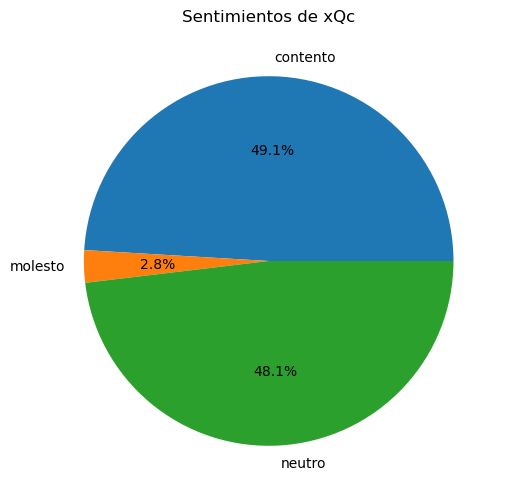

Analizando username --> elonmusk


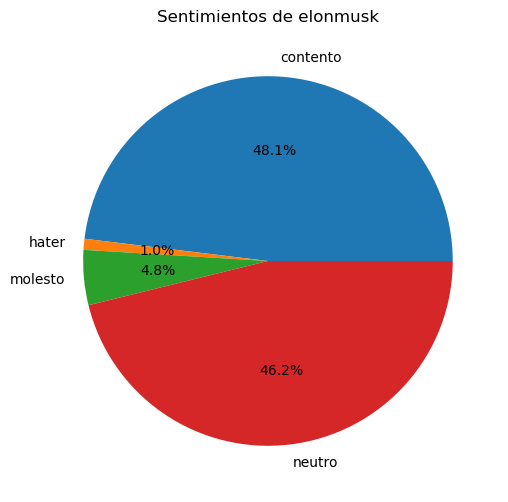

Analizando username --> jk_rowling


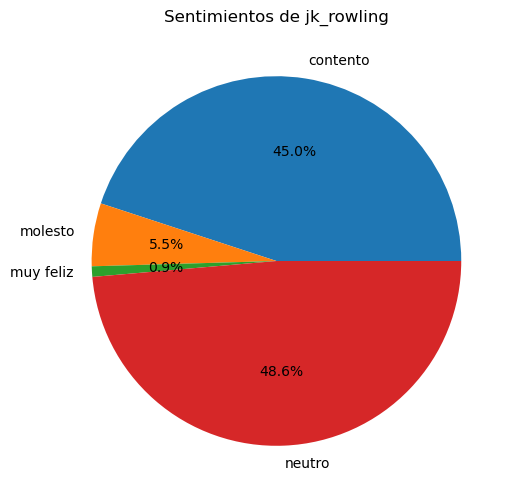

Analizando username --> pontifex


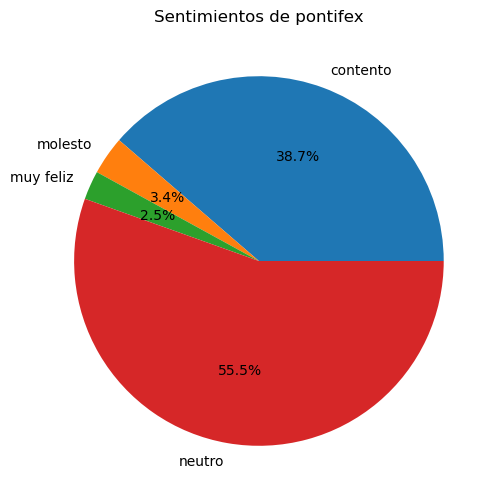

Analizando username --> bbcnews


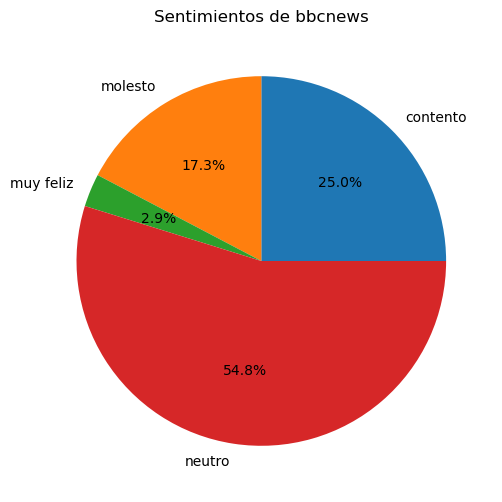

Analizando username --> AlertWorld_


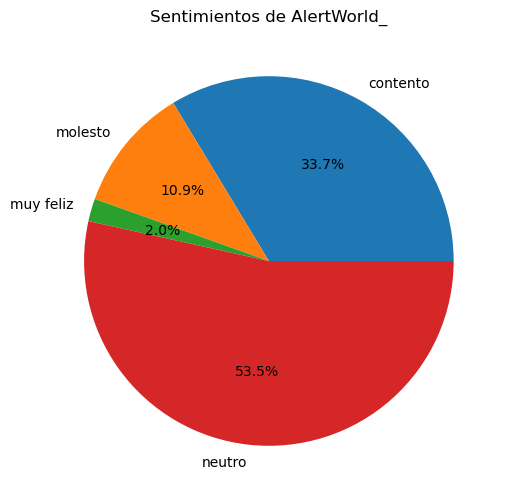

In [47]:
# Mostrar pie chart con los sentimientos
for user in usernames:
    sentiments(user)

#### Conclusión
Ninguno de los usuarios analizados, algunos conocidos por ser personas tóxicas, personas bastante hater en general pero que no trasladan sus pensamientos directamente a sus tweets, o no usan palabras clasificadas como malas y por eso la mayoría aparecen como personas contentas y, en su mayoria, neutrales.